(Source: http://www.scipy-lectures.org/packages/scikit-learn/index.html#measuring-prediction-performance)

In [1]:
%matplotlib notebook

## Quick test on KNN

In [2]:
# Get the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 


# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


In [3]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


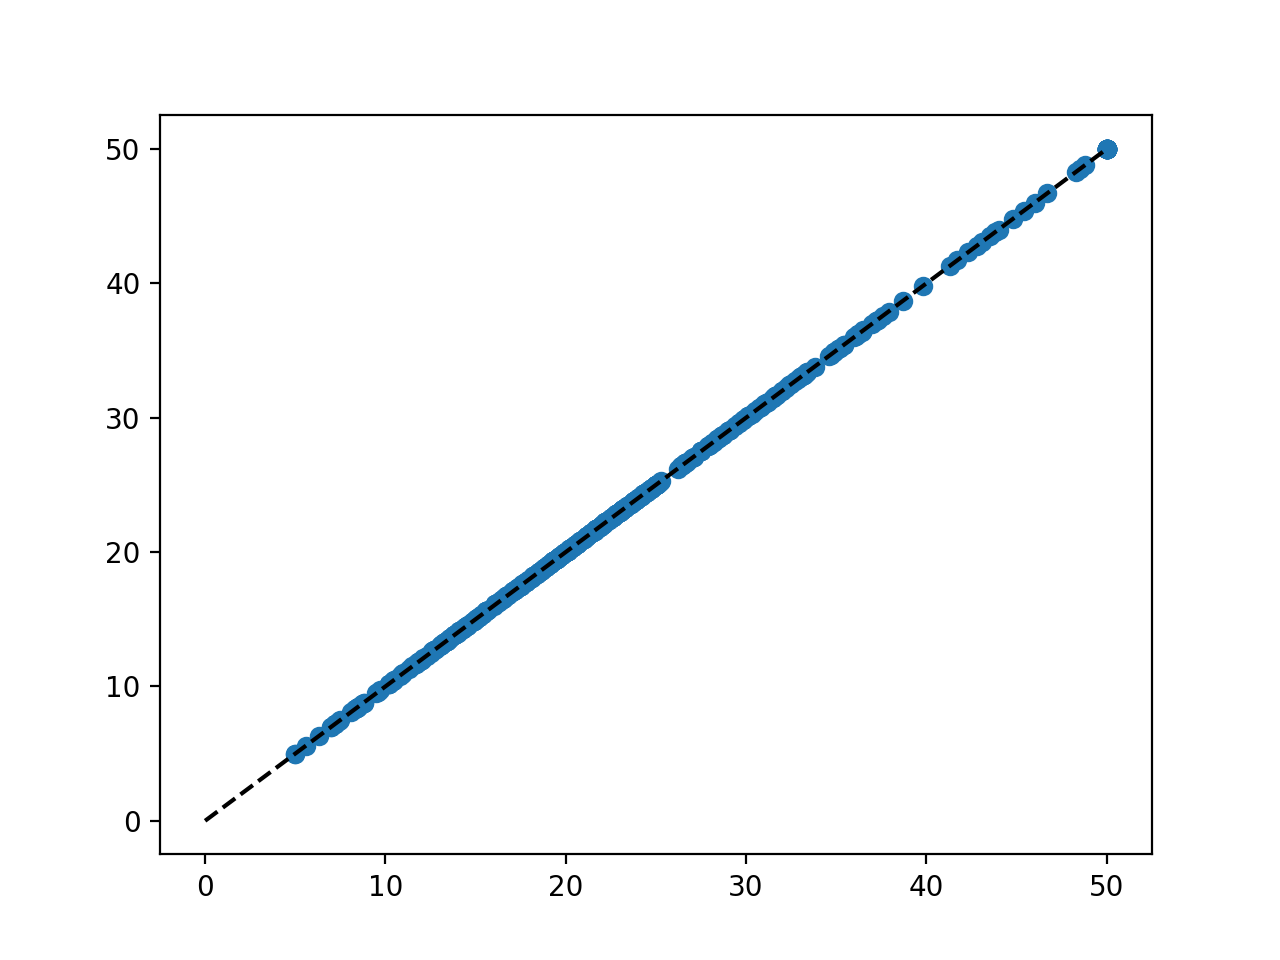

In [4]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

plt.scatter(expected, predicted) 

plt.plot([0, 50], [0, 50], '--k')

plt.show()

## Validation Sets

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

 - a training set X_train, y_train which is used for learning the parameters of a predictive model
 - a testing set X_test, y_test which is used for evaluating the fitted predictive model

In [5]:
from sklearn import model_selection
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


In [6]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [7]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

   micro avg       0.99      0.99      0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [8]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9913675218842191

In [9]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

## Validation-led Model Selection

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' % (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9283849479091444


/Users/greg/code/gkiar/sklearn-tutorials/env/sklearn/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Exercise: Which hyper parameters to choose for each classifier?

(Source: http://www.scipy-lectures.org/packages/scikit-learn/index.html#model-selection-via-validation)

(Solution: http://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_compare_classifiers.html#sphx-glr-packages-scikit-learn-auto-examples-plot-compare-classifiers-py)

## Cross Validation

In [11]:
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

array([0.9478022 , 0.9558011 , 0.96657382, 0.98039216, 0.96338028])

In [12]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv) 

array([0.98888889, 0.99444444, 0.98888889, 0.98888889, 0.98888889])

## Hyper Parameter Optimization with CV

In [13]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


In [14]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y, cv=3).mean()))

Ridge: 0.40942743830329875
Lasso: 0.35380008329932017


<IPython.core.display.Javascript object>


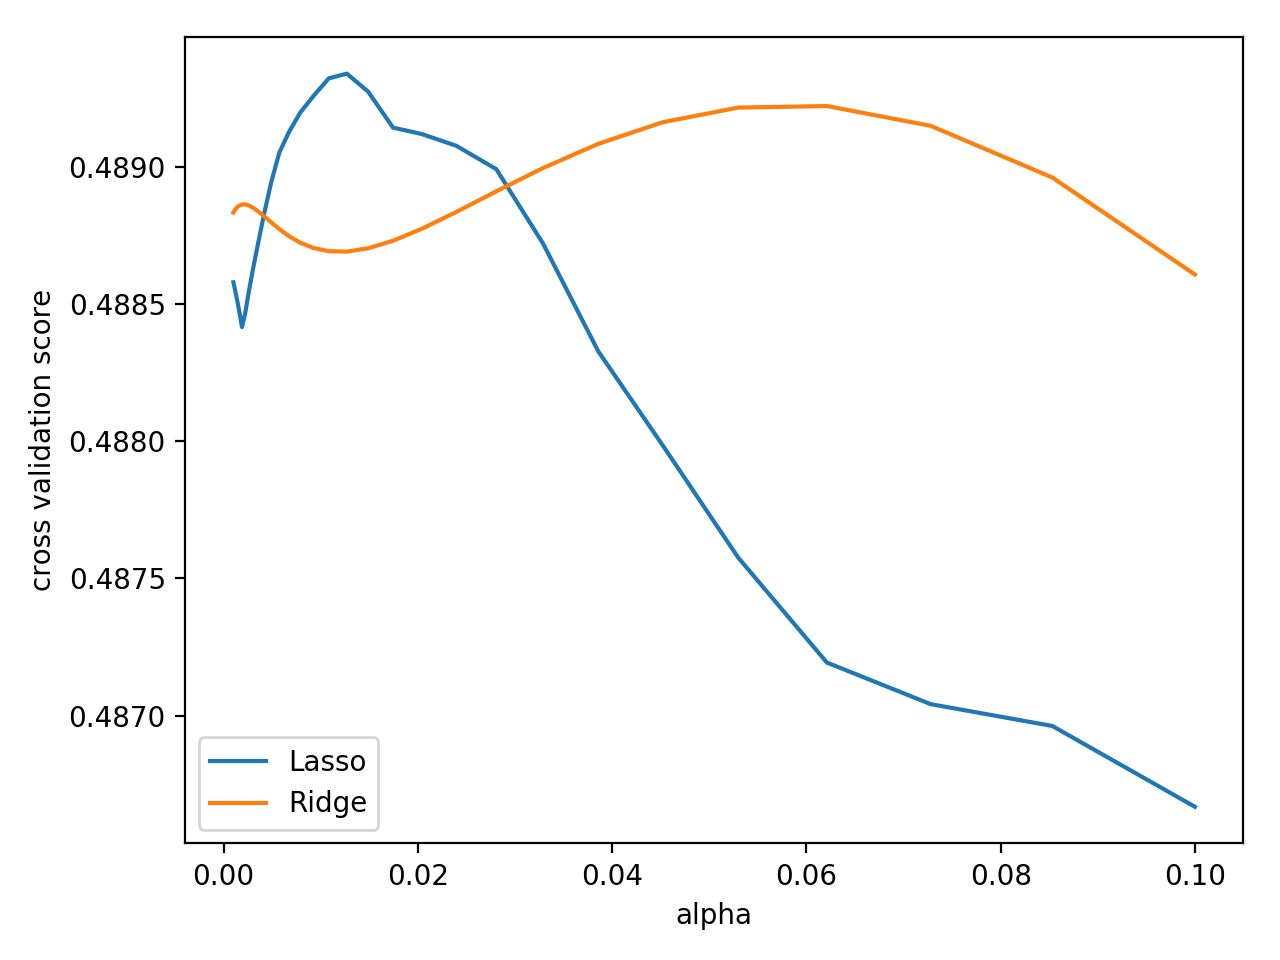

In [15]:
import numpy as np

alphas = np.logspace(-3, -1, 30)
plt.figure()
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

But, are these results actually useful?

## Grid search

In [16]:
from sklearn.model_selection import GridSearchCV
for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.06210169418915616}
Lasso: {'alpha': 0.01268961003167922}


In [17]:
from sklearn.linear_model import RidgeCV, LassoCV
for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


In [18]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.48916142454965544
LassoCV 0.4854913966864775


/Users/greg/code/gkiar/sklearn-tutorials/env/sklearn/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/greg/code/gkiar/sklearn-tutorials/env/sklearn/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
